# Credit Card Fraud Detection

![alt text](Images/capa.png)

## Introduction

With the advancement of Internet and the populatization of smartphones, more people use their credit cards to make purchases in online stores, and applications.

In a scenario like this, it is unfortunalety to be expected that some malicious people will look for ways to defraud credit cards and make purchases in the name and with money of other people.

To prevent customers from being charged for purchases that were not made by them, it is very important that banks and credit card companies are able to recognize when a given transaction is the result of fraud or not.

In this project, I will use machine learning algorithms to train a predictive model that is capable of learning and detecting when a transaction is fraudulent or not.

## dfset Overview:

The dataset contains **30,000 rows** and **25 columns**, comprising a mix of transaction, customer, and merchant details. It is primarily intended for fraud detection analysis, leveraging features like transaction timestamps, geographic data, demographic information, and other transaction-related attributes.

In [27]:
# Import Libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.validation import check_is_fitted

from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

# Load Data
df = pd.read_csv('Data/data.csv')
df.head()

,index,trans_date_trans_time,cc_num,device_os,merchant,amt,trans_num,unix_time,is_fraud,category,...,gender,street,city,zip,job,dob,lat,long,city_pop,state
0,5381,2023-01-01 00:39:03,2801374844713453,NaN,Merchant_85,252.75,TRANS_662964,1672533543,0,NaN,...,F,1st Ave,Chicago,NaN,NaN,2002-10-12,41.8781,-87.6298,2716000.0,IL
1,4008,2023-01-01 01:16:08,3460245159749480,NaN,Merchant_23,340.17,TRANS_134939,1672535768,0,Entertainment,...,M,Broadway,New York,90146.0,Nurse,2001-12-23,40.7128,-74.0060,8419600.0,NY
2,1221,2023-01-01 01:24:28,7308701990157768,macOS,Merchant_70,76.38,TRANS_258923,1672536268,0,Electronics,...,M,Broadway,Phoenix,36374.0,Doctor,1978-12-13,33.4484,-112.0740,1680992.0,AZ
3,9609,2023-01-01 02:06:57,8454886440761098,X11,Merchant_33,368.88,TRANS_226814,1672538817,0,Electronics,...,F,2nd Ave,Phoenix,34323.0,Teacher,1965-04-21,33.4484,-112.0740,1680992.0,AZ
4,5689,2023-01-01 02:10:54,6350332939133843,NaN,Merchant_90,323.32,TRANS_668449,1672539054,0,Groceries,...,F,Maple St,New York,77743.0,Nurse,1997-05-17,40.7128,-74.0060,8419600.0,NY


In [28]:
df.describe()

,index,cc_num,amt,unix_time,is_fraud,merch_lat,merch_long,merchant_id,zip,lat,long,city_pop
count,30000.00000,3.000000e+04,29900.000000,3.000000e+04,30000.000000,29401.000000,29990.000000,29990.000000,29784.000000,10020.000000,10020.000000,1.002000e+04
mean,14994.93820,5.638691e+15,250.063287,1.705650e+09,0.019033,2.990787,-7.727705,50.446215,58070.908944,35.726876,-98.630250,3.704410e+06
std,8664.71394,2.743709e+15,144.106058,1.530499e+07,0.136644,55.651821,103.254575,28.939210,24749.348964,4.531306,15.963517,2.323382e+06
min,0.00000,1.001432e+15,1.010000,1.672534e+09,0.000000,-88.616543,-178.256215,1.000000,10008.000000,29.760400,-118.243700,1.680992e+06
25%,7478.75000,3.256119e+15,125.235000,1.696269e+09,0.000000,-46.105529,-101.993026,25.000000,39192.000000,33.448400,-112.074000,2.328000e+06
50%,14999.50000,5.491563e+15,249.625000,1.706376e+09,0.000000,0.067189,-16.648430,50.000000,58583.000000,34.052200,-95.369800,2.716000e+06
75%,22499.25000,8.149117e+15,375.242500,1.718328e+09,0.000000,49.823343,90.051574,76.000000,78251.000000,40.712800,-87.629800,3.979576e+06
max,29999.00000,1.000000e+16,499.970000,1.730124e+09,1.000000,89.069132,178.663853,100.000000,99994.000000,41.878100,-74.006000,8.419600e+06


In [29]:
df.isnull().sum().max()

19980

In [30]:
df.columns

Index(['index', 'trans_date_trans_time', 'cc_num', 'device_os', 'merchant',
       'amt', 'trans_num', 'unix_time', 'is_fraud', 'category', 'merch_lat',
       'merch_long', 'merchant_id', 'first', 'last', 'gender', 'street',
       'city', 'zip', 'job', 'dob', 'lat', 'long', 'city_pop', 'state'],
      dtype='object')

In [31]:
print('No Frauds', round(df['is_fraud'].value_counts()[0]/len(df) * 100,2), '% of the dfset')
print('Frauds', round(df['is_fraud'].value_counts()[1]/len(df) * 100,2), '% of the dfset')

No Frauds 98.1 % of the dfset
Frauds 1.9 % of the dfset


Our original dataset is very imbalanced! Most of the transactions are not fraudulent. Using this dataframe as the base for our predictive models and analysis would lead to a model that is not able to detect frauds and our algorithms will probably overfit since it will be biased towards the majority class.

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

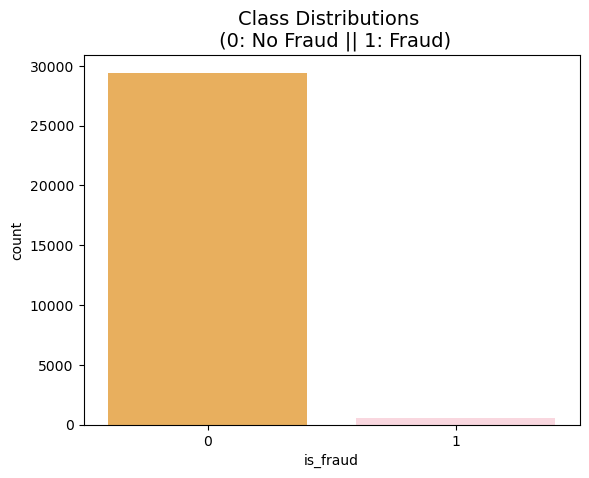

In [32]:
colors = [
    "#ffb347", "#ffd1dc", "#b19cd9", "#ffcccb", "#fdfd96", 
    "#cfcfc4", "#ffb6c1", "#c3b091", "#d8bfd8", "#add8e6",
    "#90ee90", "#f08080", "#fafad2", "#dda0dd", "#ffc0cb",
    "#ffdab9", "#e6e6fa", "#98fb98", "#ffe4e1", "#afeeee",
    "#f5deb3", "#ffdead", "#e0ffff", "#d3ffce", "#ff69b4"
]

sns.countplot(x='is_fraud', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

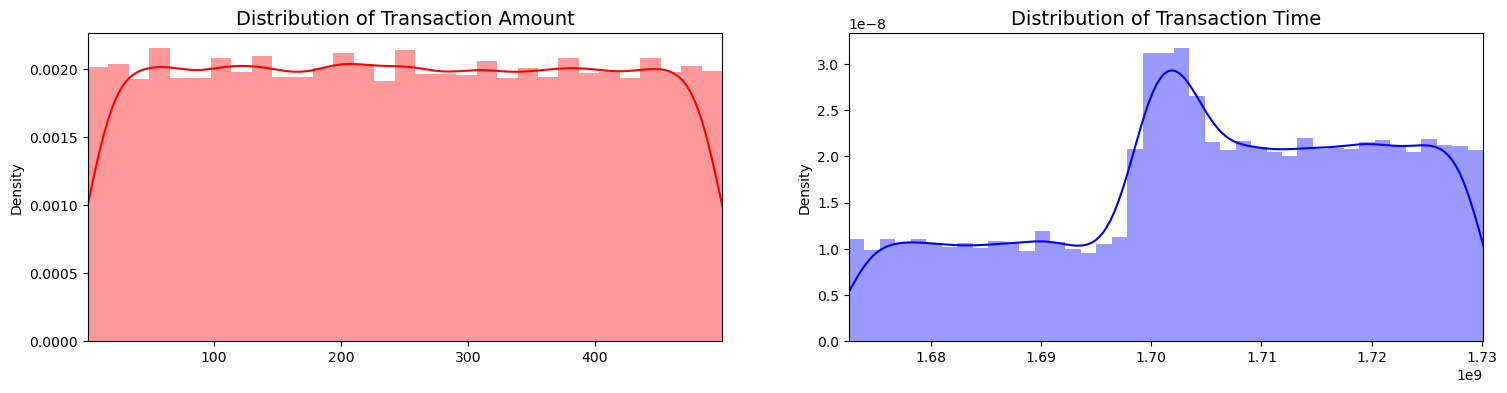

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['amt'].values
time_val = df['unix_time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

The plot **Distribution of Transaction Amount** shows how the transaction amounts are distributed in the dataset. It provides insights into the frequency and probability density of different transaction amounts. The heights of these bars indicate how common transactions in that range are. The red line is a smoothed curve representing the probability density of transaction amounts. It provides a continuous representation of where the values are concentrated. The transaction amounts seem almost uniformly distributed, meaning all ranges of amounts are equally likely, with no distinct peaks or clusters. A slight decrease at the extreme ends of the range (both low and high amounts) indicates fewer transactions occur at these extremes.

The plot **Distribution of Transaction Time** visualizes when transactions occur over time. The plot helps identify patterns or spikes in transaction activity.
We can see the number of transactions occurring within specific time intervals. This discretized view shows how activity varies over time. The blue smoothed curve illustrates the probability density of transactions over time, helping to highlight trends that the histogram alone might not reveal. A prominent spike is visible in the middle of the time range, suggesting a high volume of transactions during that period. After the spike, transaction activity gradually declines, then stabilizes with smaller peaks and dips toward the end of the timeline. The presence of these variations could indicate periods of higher activity due to specific events or trends.

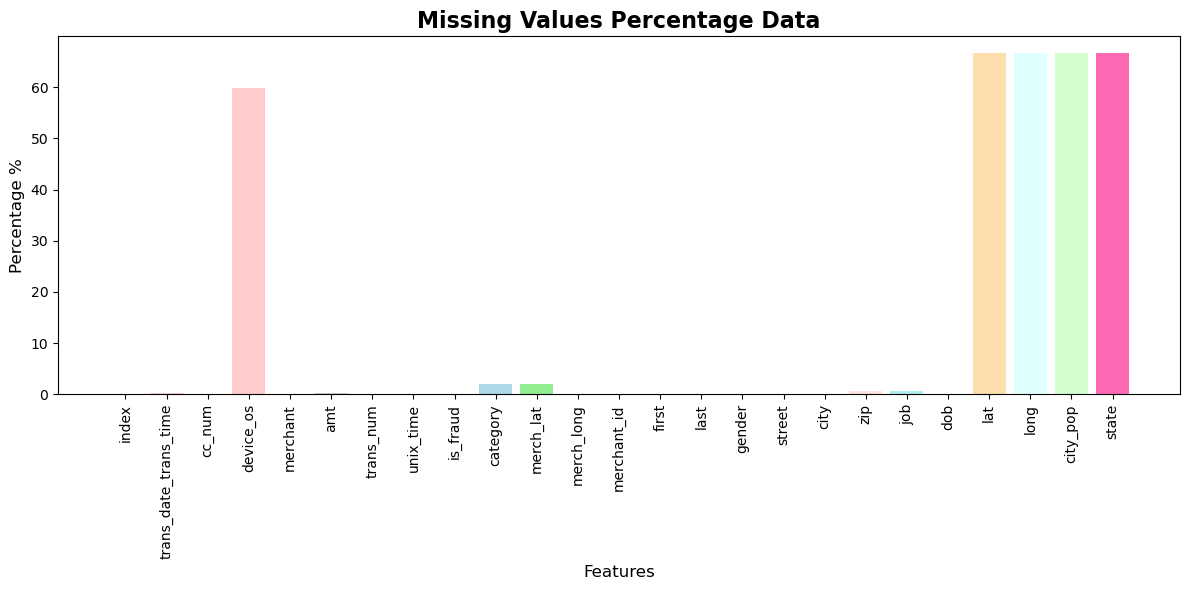

In [34]:
# Plot Missing Values
missing_values = (df.isnull().sum() / len(df)) * 100
plt.figure(figsize=(12, 6))
plt.bar(missing_values.index, missing_values.values, color=colors)
plt.title(f"Missing Values Percentage Data", fontsize=16, fontweight="bold")
plt.ylabel("Percentage %", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [35]:
columns_to_remove = ['first', 'last', 'merchant', 'index', 'trans_num', 
                     'merchant_id', 'lat', 'long', 'device_os', 'city_pop', 
                     'state', 'trans_date_trans_time', 'street', 'city', 'dob', 
                     'merch_lat', 'merch_long', 'job', 'category']

df = df.drop(columns=columns_to_remove, errors='ignore')

# Feature engineering

df['time_since_last_transaction'] = df.groupby('cc_num')['unix_time'].diff().fillna(0)
df['transaction_hour'] = (df['unix_time'] % 86400) // 3600  # Hour of day from seconds
window_seconds = 3600  # 1 hour window
# Calculate transaction density within a 1-hour window
df['transaction_density'] = df.groupby('cc_num')['unix_time'].transform(
    lambda x: x.rolling(window=window_seconds, min_periods=1).apply(
        lambda y: ((y.max() - y.min()) <= window_seconds).sum(), raw=True
    )
)
df['avg_transaction_amt'] = df.groupby('cc_num')['amt'].transform('mean')

df['amt_deviation'] = np.abs(df['amt'] - df['avg_transaction_amt'])

df['transactions_per_card'] = df.groupby('cc_num')['cc_num'].transform('count')

df['transaction_std_by_card'] = df.groupby('cc_num')['amt'].transform('std')

df['z_score_amt'] = (df['amt'] - df['avg_transaction_amt']) / df['transaction_std_by_card']

df['high_value_flag'] = (df['amt'] > (df['avg_transaction_amt'] * 1.5)).astype(int)

df['consecutive_high_value'] = (df['high_value_flag'].shift(1).fillna(0).astype(bool) & df['high_value_flag'].astype(bool)).astype(int)

df['high_z_score_flag'] = (df['z_score_amt'].abs() > 2).astype(int)

df = pd.get_dummies(df, columns=['gender'], drop_first=True)

rob_scaler = RobustScaler()

numeric_columns = ['amt','unix_time', 'cc_num', 'zip', 'avg_transaction_amt', 
                   'amt_deviation', 'transactions_per_card', 'transaction_std_by_card', 
                   'z_score_amt', 'time_since_last_transaction', 'transaction_density', 'transaction_hour', 
                   'high_value_flag', 'consecutive_high_value', 'high_z_score_flag']
df[numeric_columns] = rob_scaler.fit_transform(df[numeric_columns])

df.head()

,cc_num,amt,unix_time,is_fraud,zip,time_since_last_transaction,transaction_hour,transaction_density,avg_transaction_amt,amt_deviation,transactions_per_card,transaction_std_by_card,z_score_amt,high_value_flag,consecutive_high_value,high_z_score_flag,gender_M
0,-0.549804,0.012500,-1.534186,0,NaN,-0.115843,-0.897959,1.0,-2.095959,-0.631805,-0.937500,1.834725,0.161222,0.0,0.0,0.0,False
1,-0.415148,0.362169,-1.534085,0,0.808085,-0.115843,-0.816327,1.0,1.240788,-0.453455,-0.932292,0.289859,0.265373,0.0,0.0,0.0,True
2,0.371375,-0.692959,-1.534062,0,-0.568601,-0.115843,-0.816327,1.0,0.561998,0.537503,-0.932292,1.107798,-0.708703,0.0,0.0,0.0,True
3,0.605625,0.477006,-1.533947,0,-0.621112,-0.115843,-0.734694,1.0,0.914425,-0.165055,-0.890625,-0.121247,0.418863,0.0,0.0,0.0,False
4,0.175510,0.294771,-1.533936,0,0.490540,-0.115843,-0.734694,1.0,-0.738370,-0.271933,-0.932292,-5.296308,0.563228,0.0,0.0,0.0,False


In [36]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Stratified K-Fold
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    
    # Split into train and test
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
    # 1. **Impute Missing Values in Train Data**
    for column in original_Xtrain.select_dtypes(include=[np.number]).columns:
        median_value = original_Xtrain[column].median()
        original_Xtrain[column] = original_Xtrain[column].fillna(median_value)
    
    for column in original_Xtrain.select_dtypes(include=[object, 'category']).columns:
        mode_value = original_Xtrain[column].mode()[0]
        original_Xtrain[column] = original_Xtrain[column].fillna(mode_value)

    # 2. **Impute Missing Values in Test Data**
    for column in original_Xtest.select_dtypes(include=[np.number]).columns:
        median_value = original_Xtrain[column].median()  # Use train's median
        original_Xtest[column] = original_Xtest[column].fillna(median_value)
        
    for column in original_Xtest.select_dtypes(include=[object, 'category']).columns:
        mode_value = original_Xtrain[column].mode()[0]  # Use train's mode
        original_Xtest[column] = original_Xtest[column].fillna(mode_value)

# Convert to NumPy arrays
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

print("\n")

# Check for missing values in Train Data
print("Missing values in Train Data:", np.isnan(original_Xtrain.astype(float)).sum())

# 3. **Apply SMOTE on the Training Set**
smote = SMOTE(random_state=42)
Xtrain_resampled, ytrain_resampled = smote.fit_resample(original_Xtrain, original_ytrain)
processed_data = pd.concat([pd.DataFrame(Xtrain_resampled, columns=X.columns), pd.Series(ytrain_resampled, name='is_fraud')], axis=1)
processed_data.to_csv('Data/train_processed.csv', index=False)
print(f"Training data processed and saved to {'Data/train_processed.csv'}")
print("\n")
# Check for missing values in Test Data
print("Missing values in Test Data:", np.isnan(original_Xtest.astype(float)).sum())
# Save Test Data
processed_data = pd.concat([pd.DataFrame(original_Xtest, columns=X.columns), pd.Series(original_ytest, name='is_fraud')], axis=1)
processed_data.to_csv('Data/test_processed.csv', index=False)
print(f"Test data processed and saved to {'Data/test_processed.csv'}")
print("\n")

Train: [ 5996  5997  5998 ... 29997 29998 29999] Test: [   0    1    2 ... 6063 6126 6140]
Train: [    0     1     2 ... 29997 29998 29999] Test: [ 5996  5997  5998 ... 12340 12341 12342]
Train: [    0     1     2 ... 29997 29998 29999] Test: [10086 10087 10088 ... 18226 18227 18228]
Train: [    0     1     2 ... 29997 29998 29999] Test: [10200 10201 10202 ... 24112 24113 24114]
Train: [    0     1     2 ... 24112 24113 24114] Test: [10314 10315 10316 ... 29997 29998 29999]


Missing values in Train Data: 0
Training data processed and saved to Data/train_processed.csv


Missing values in Test Data: 0
Test data processed and saved to Data/test_processed.csv




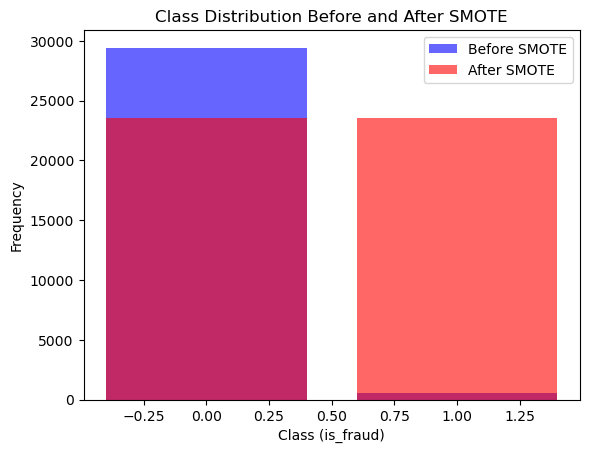

In [37]:
# Load Processed Data
   
original_train_data = pd.read_csv('Data/data.csv')
df = pd.read_csv('Data/train_processed.csv')

# Plotting class distribution before SMOTE
original_counts = Counter(original_train_data['is_fraud'])
plt.bar(original_counts.keys(), original_counts.values(), color='blue', alpha=0.6, label="Before SMOTE")

# Plotting class distribution after SMOTE
augmented_counts = Counter(df['is_fraud'])
plt.bar(augmented_counts.keys(), augmented_counts.values(), color='red', alpha=0.6, label="After SMOTE")

plt.title("Class Distribution Before and After SMOTE")
plt.xlabel("Class (is_fraud)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

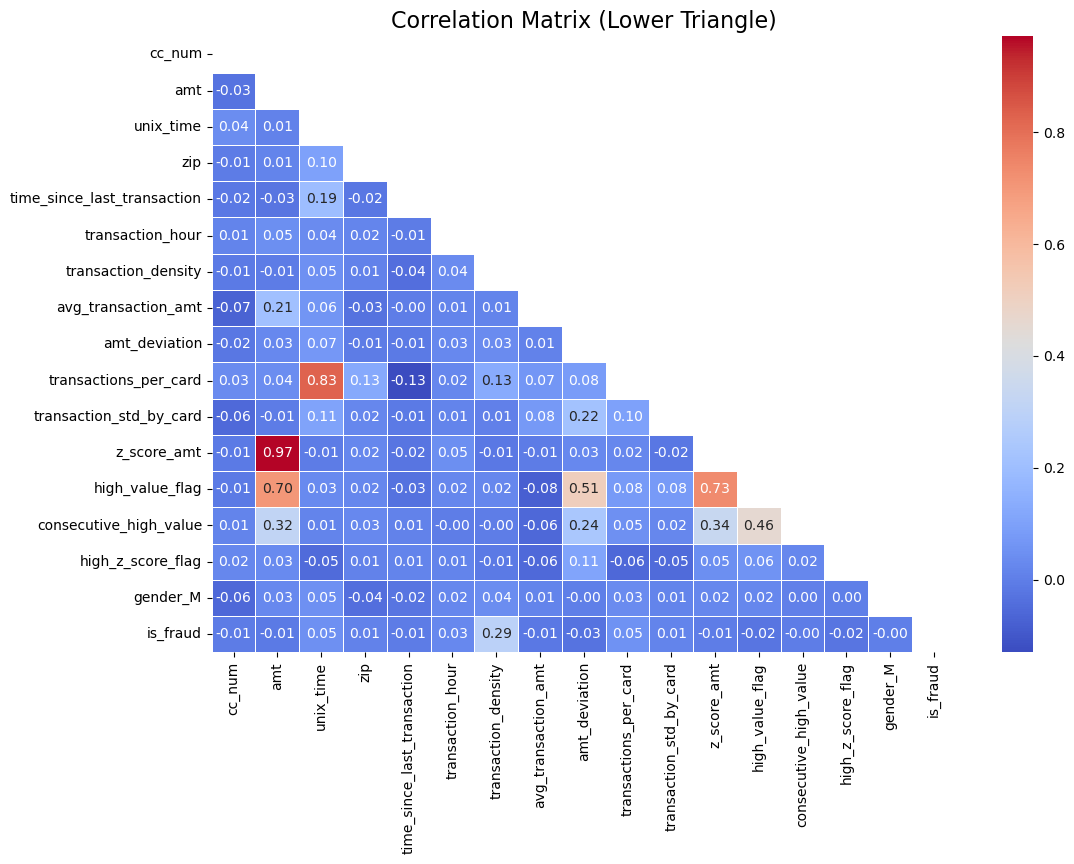

In [38]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool_))

# Plot the heatmap with the mask
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Lower Triangle)", fontsize=16)
plt.show()

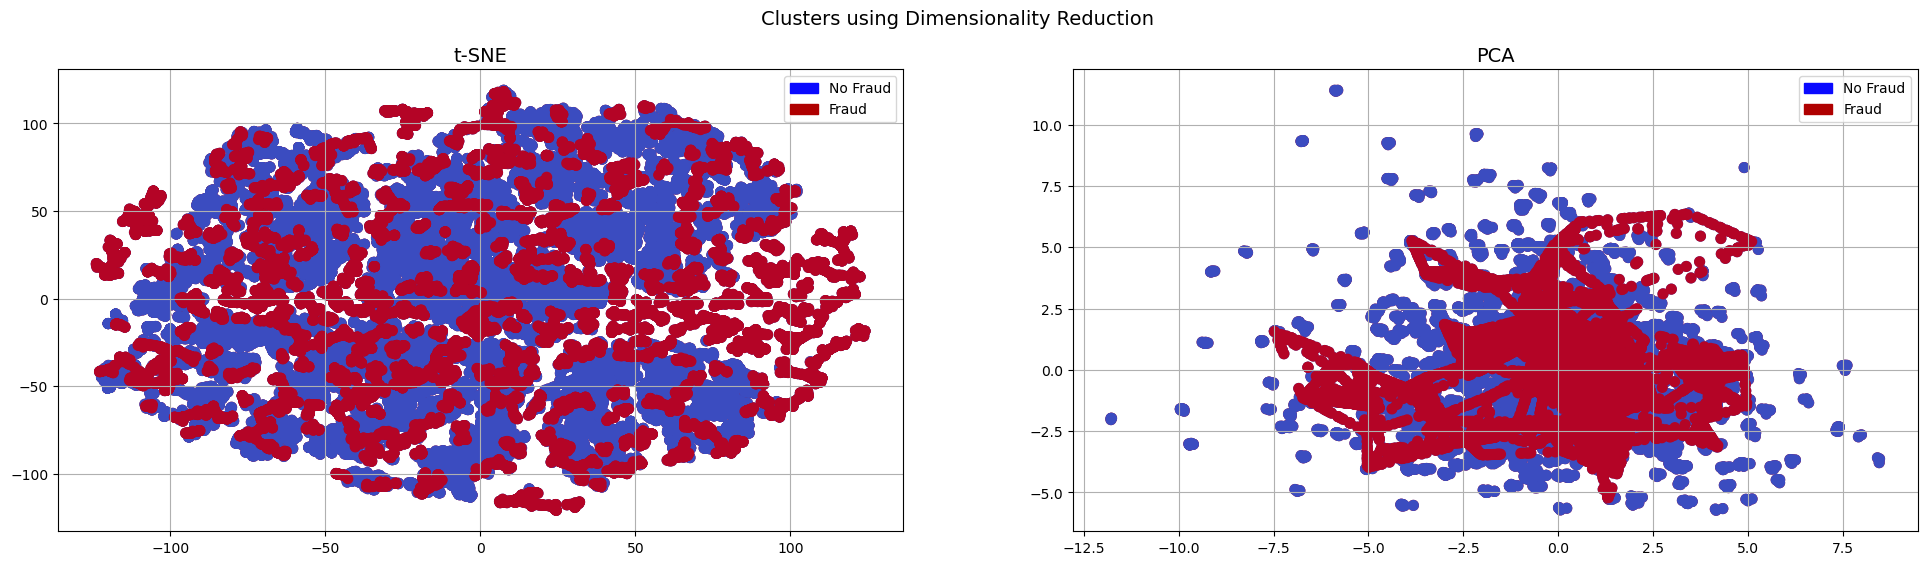

In [39]:
#Dimensionality Reduction and Clustering:


X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Dimensionality Reduction using t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])


Best Estimators Loaded Successfully!

Available keys in best_estimators: ['Logistic Regression', 'KNearest', 'Support Vector Classifier', 'Decision Tree', 'Random Forest']

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      5885
           1       0.02      0.09      0.04       115

    accuracy                           0.91      6000
   macro avg       0.50      0.51      0.50      6000
weighted avg       0.96      0.91      0.94      6000



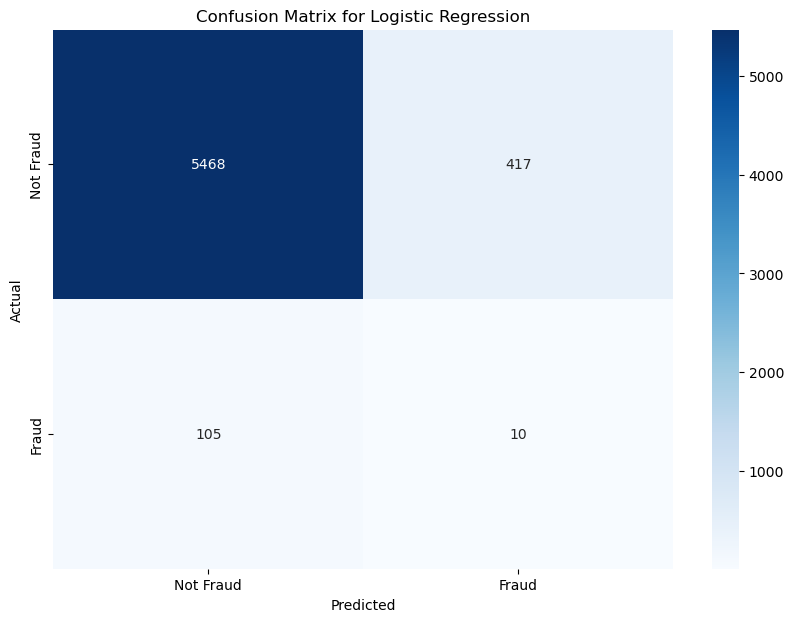

AUC for Logistic Regression: 0.57

------------------------------------------------------------


Model: Support Vector Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5885
           1       0.03      0.24      0.05       115

    accuracy                           0.82      6000
   macro avg       0.50      0.54      0.47      6000
weighted avg       0.96      0.82      0.88      6000



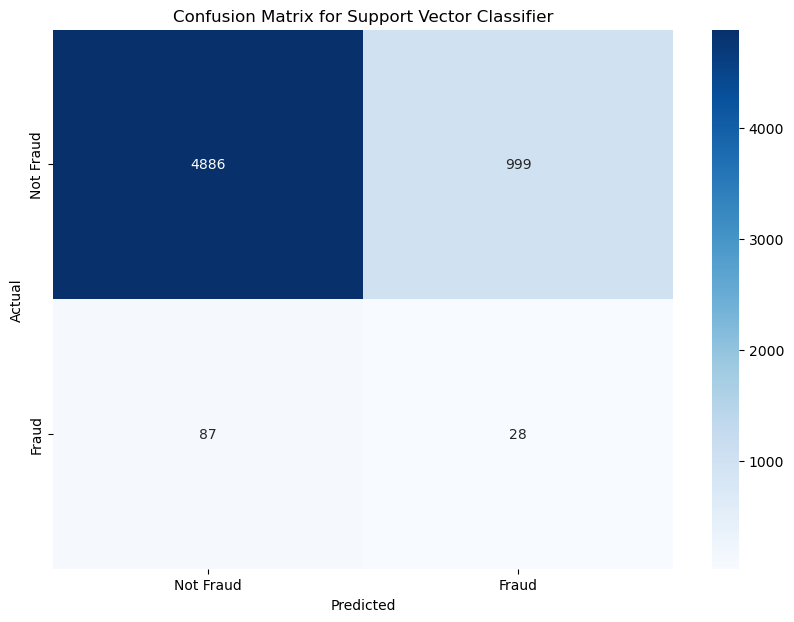

AUC for Support Vector Classifier: 0.57

------------------------------------------------------------


Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5885
           1       1.00      0.03      0.05       115

    accuracy                           0.98      6000
   macro avg       0.99      0.51      0.52      6000
weighted avg       0.98      0.98      0.97      6000



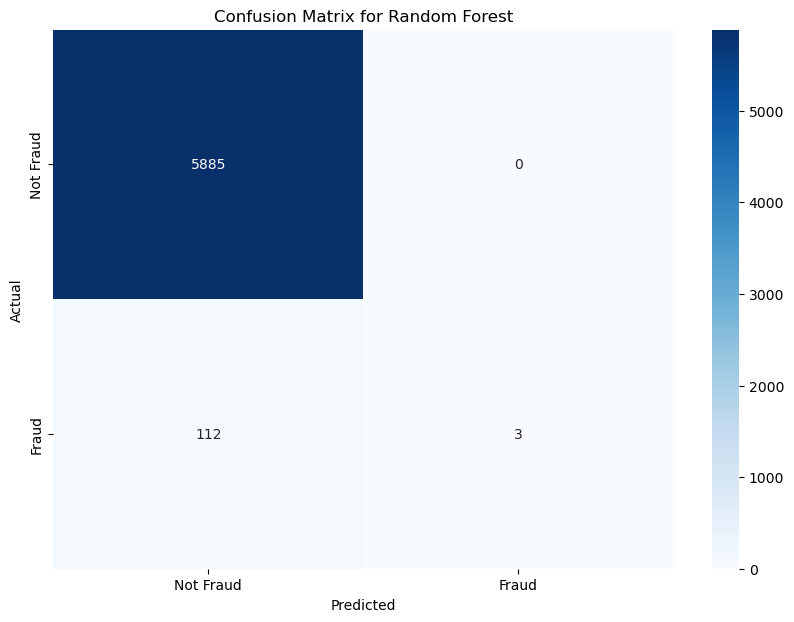

AUC for Random Forest: 0.54

------------------------------------------------------------


Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5885
           1       1.00      0.03      0.05       115

    accuracy                           0.98      6000
   macro avg       0.99      0.51      0.52      6000
weighted avg       0.98      0.98      0.97      6000



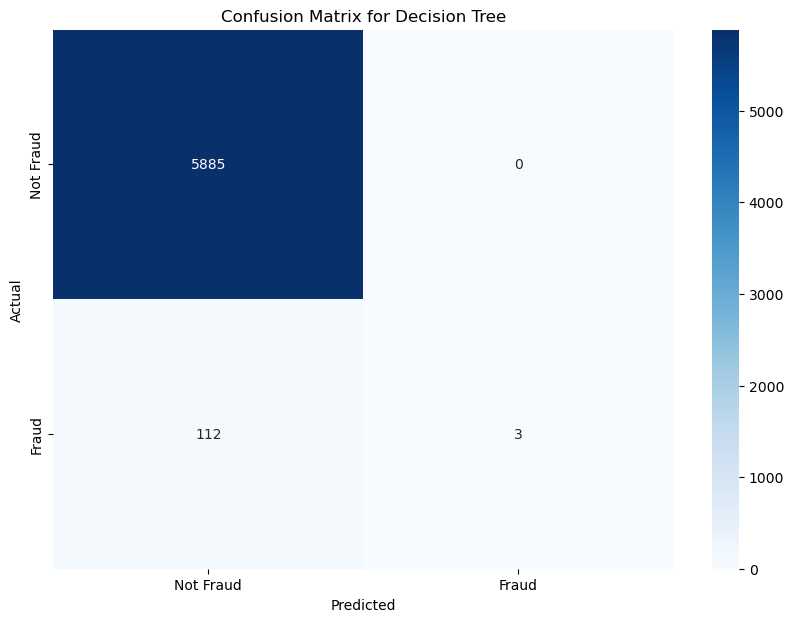

AUC for Decision Tree: 0.53

------------------------------------------------------------


Feature Importance for Logistic Regression:
                             Feature Importance
transaction_density                    2.215188
z_score_amt                            1.282910
unix_time                              0.333065
consecutive_high_value                 0.131773
transaction_hour                       0.062315
avg_transaction_amt                    0.057802
transaction_std_by_card                0.023737
zip                                    0.011669
cc_num                                -0.045907
time_since_last_transaction           -0.065351
gender_M                              -0.070805
amt_deviation                         -0.103181
high_value_flag                       -0.234292
transactions_per_card                 -0.326949
high_z_score_flag                     -0.978962
amt                                   -1.201089

-----------------------------------------------

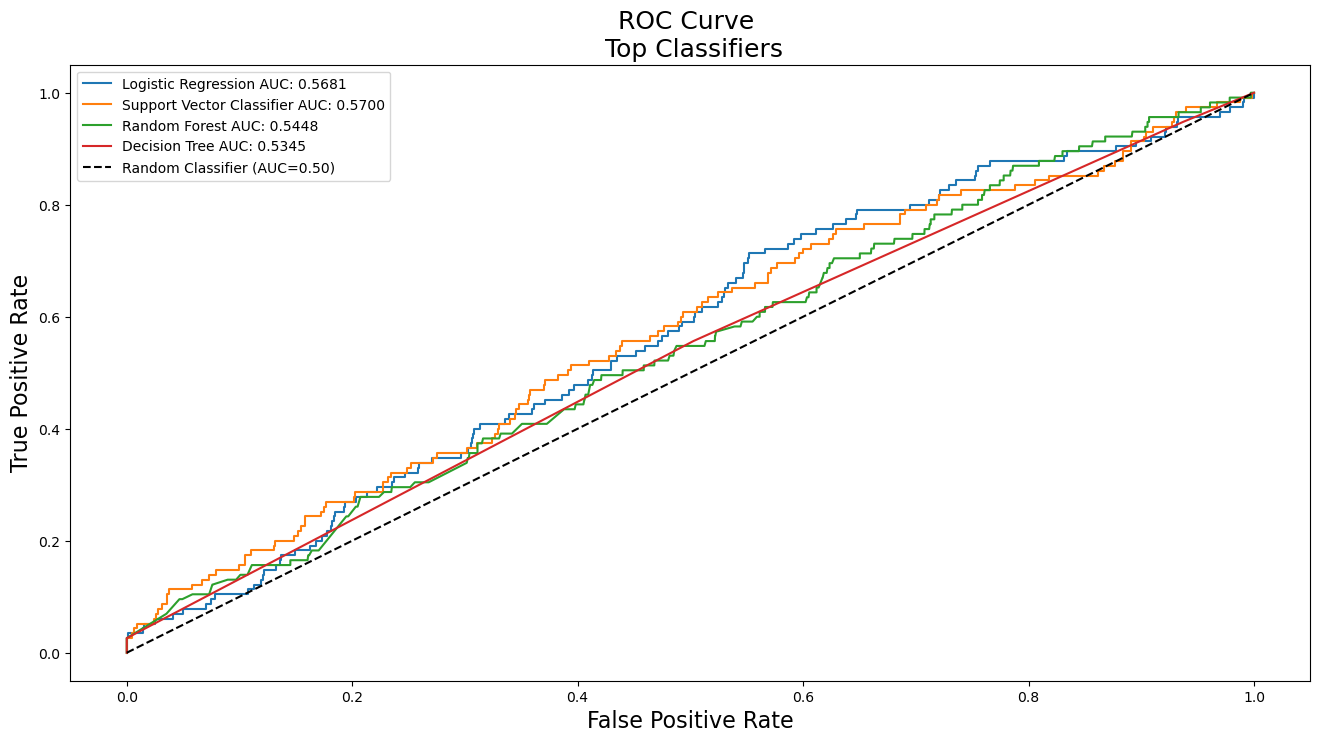

Model Logistic Regression saved to Models/Logistic Regression.pkl
Model KNearest saved to Models/KNearest.pkl
Model Support Vector Classifier saved to Models/Support Vector Classifier.pkl
Model Decision Tree saved to Models/Decision Tree.pkl
Model Random Forest saved to Models/Random Forest.pkl


In [44]:
#Let's start training our models:

#**Load Processed Data**
train_data = pd.read_csv('Data/train_processed.csv')
test_data = pd.read_csv('Data/test_processed.csv')

# Split the data into features and target
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

#**Import the best estimators from the hyperparameter tuning**
try:
    best_estimators = joblib.load('Models/best_estimators.pkl')
    print("Best Estimators Loaded Successfully!")
    print("\nAvailable keys in best_estimators:", list(best_estimators.keys()))
except Exception as e:
    print(f"Error loading best_estimators: {e}")
    exit()


# **Train and Evaluate the Models**
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

predicted_proba = {}  # Initialize the dictionary to store predicted probabilities

for model_name, model in models.items():
    if model_name not in best_estimators:
        print(f"Warning: {model_name} not found in best_estimators. Skipping...")
        continue
    
    try:
        model = best_estimators[model_name]
        model.fit(X_train, y_train)  # Train the model before predictions
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Get predicted probabilities if possible
        y_pred_proba = None
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_pred_proba = model.decision_function(X_test)
        else:
            print(f"Warning: No predicted probabilities available for {model_name}, AUC cannot be calculated.")
        
        # Store the predicted probabilities for ROC curve plotting
        if y_pred_proba is not None:
            predicted_proba[model_name] = y_pred_proba
        
        # Print classification report
        print(f"\nModel: {model_name}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {model_name}')
        plt.show()

        # Calculate and print AUC
        if y_pred_proba is not None:
            auc = roc_auc_score(y_test, y_pred_proba)
            print(f"AUC for {model_name}: {auc:.2f}")
        
    except Exception as e:
        print(f"Error training {model_name}: {e}")

    print("\n" + "-"*60 + "\n")


# **Feature Importance for Each Model**
for model_name, model in models.items():
    if model_name not in best_estimators:
        print(f"Warning: {model_name} not found in best_estimators. Skipping...")
        continue

    try:
        model = best_estimators[model_name]
        
        if hasattr(model, 'coef_'):
            # Logistic Regression
            feature_importance = pd.DataFrame(model.coef_.T, index=X_train.columns, columns=['Feature Importance'])
        elif hasattr(model, 'feature_importances_'):
            # Tree-based models
            feature_importance = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['Feature Importance'])
        else:
            print(f"Feature importance not available for {model_name}.")
            continue

        feature_importance = feature_importance.sort_values(by='Feature Importance', ascending=False)
        print(f"\nFeature Importance for {model_name}:")
        print(feature_importance)
    except Exception as e:
        print(f"Error calculating feature importance for {model_name}: {e}")

    print("\n" + "-"*60 + "\n")

# **Plot the ROC Curve for Each Model**
plt.figure(figsize=(16, 8))
plt.title('ROC Curve \n Top Classifiers', fontsize=18)

for model_name, y_proba in predicted_proba.items():
    try:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} AUC: {roc_auc:.4f}')
    except Exception as e:
        print(f"Error calculating ROC for {model_name}: {e}")

# Plot a random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC=0.50)')

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()


#**Save the Best Models**
for model_name, model in best_estimators.items():
    try:
        check_is_fitted(model)  # Check if model is fitted
        joblib.dump(model, f'Models/{model_name}.pkl')
        print(f"Model {model_name} saved to Models/{model_name}.pkl")
    except Exception as e:
        print(f"Error saving {model_name}: {e}")

In [42]:
import pandas as pd
import joblib
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score

#Load the Kaggle test data
test_data = pd.read_csv('Data/test_processed.csv')

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_test = test_data.drop('is_fraud', axis=1)
X_test = imputer.fit_transform(X_test)

# Split the data into features and target
y_test = test_data['is_fraud']

# Drop unnecessary columns
columns_to_drop = ['trans_date_trans_time', 'merchant', 'trans_num', 'device_os', 'index']
test_data = test_data.drop(columns=columns_to_drop, errors='ignore')

# Feature engineering
test_data['time_since_last_transaction'] = test_data.groupby('cc_num')['unix_time'].diff().fillna(0)
test_data['transaction_hour'] = (test_data['unix_time'] % 86400) // 3600
window_seconds = 3600
test_data['transaction_density'] = test_data.groupby('cc_num')['unix_time'].transform(
    lambda x: x.rolling(window=window_seconds, min_periods=1).apply(
        lambda y: ((y.max() - y.min()) <= window_seconds).sum(), raw=True
    )
)
test_data['avg_transaction_amt'] = test_data.groupby('cc_num')['amt'].transform('mean')
test_data['amt_deviation'] = np.abs(test_data['amt'] - test_data['avg_transaction_amt'])
test_data['transactions_per_card'] = test_data.groupby('cc_num')['cc_num'].transform('count')
test_data['transaction_std_by_card'] = test_data.groupby('cc_num')['amt'].transform('std')
test_data['z_score_amt'] = (test_data['amt'] - test_data['avg_transaction_amt']) / test_data['transaction_std_by_card']
test_data['high_value_flag'] = (test_data['amt'] > (test_data['avg_transaction_amt'] * 1.5)).astype(int)
test_data['consecutive_high_value'] = (test_data['high_value_flag'].shift(1).fillna(0).astype(bool) & test_data['high_value_flag'].astype(bool)).astype(int)
test_data['high_z_score_flag'] = (test_data['z_score_amt'].abs() > 2).astype(int)

# Handle missing features
try:
    trained_features = joblib.load('Models/features.pkl')
except FileNotFoundError:
    raise Exception("Trained features file 'Models/features.pkl' not found. Please ensure it is saved properly during training.")

for feature in trained_features:
    if feature not in test_data.columns:
        test_data[feature] = 0

extra_columns = set(test_data.columns) - set(trained_features)
if extra_columns:
    test_data = test_data.drop(columns=extra_columns, errors='ignore')

test_data = test_data[trained_features]

# Scaling the features
rob = RobustScaler()
test_data = rob.fit_transform(test_data)

#Load the models
try:
    models = {
        'lr': joblib.load('Models/Logistic Regression.pkl'),
        'svc': joblib.load('Models/Support Vector Classifier.pkl'),
        'knn': joblib.load('Models/KNearest.pkl'),
        'rfc': joblib.load('Models/Random Forest.pkl'),
        'dtc': joblib.load('Models/Decision Tree.pkl')
    }
except Exception as e:
    raise Exception(f"Error loading models: {e}")

#Calculate AUC for each model
auc_scores = {}

for model_name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(test_data)[:, 1]
        elif hasattr(model, 'decision_function'):
            decision_scores = model.decision_function(test_data)
            y_pred_proba = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
        else:
            print(f"Warning: No predicted probabilities available for {model_name}, skipping AUC calculation.")
            continue
        
        auc_score = roc_auc_score(y_test, y_pred_proba)
        auc_scores[model_name] = auc_score
        print(f"AUC for {model_name}: {auc_score:.4f}")
        
    except Exception as e:
        print(f"Error calculating AUC for {model_name}: {e}")

#Select the model with the highest AUC
best_model_name = max(auc_scores, key=auc_scores.get)
best_model = models[best_model_name]
print(f"\n🎉 Best model is: {best_model_name} with AUC: {auc_scores[best_model_name]:.4f}\n")

#Generate predictions using the best model
if hasattr(best_model, "predict_proba"):
    best_probs = best_model.predict_proba(test_data)[:, 1]
elif hasattr(best_model, 'decision_function'):
    decision_scores = best_model.decision_function(test_data)
    best_probs = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
else:
    raise Exception(f"Cannot predict probabilities for model {best_model_name}.")

# Truncate to 2000 rows and round probabilities
best_probs = best_probs[:2000]
best_probs = np.round(best_probs, 1)

# Create the submission file
submission_df = pd.DataFrame({
    'index': range(30000, 32000),  # Index must be 30000 to 31999 (2000 rows)
    'is_fraud': best_probs  # Predictions from the best model
})

submission_df.to_csv('Data/submission_kaggle.csv', index=False)
print(f"Submission file 'submission_kaggle.csv' generated successfully with {len(submission_df)} rows.")


AUC for lr: 0.5207
AUC for svc: 0.5331
AUC for knn: 0.4855
AUC for rfc: 0.5735
AUC for dtc: 0.5269

🎉 Best model is: rfc with AUC: 0.5735

Submission file 'submission_kaggle.csv' generated successfully with 2000 rows.
